<a href="https://colab.research.google.com/github/Rahul2661998/EDA-Capstone-project-AirBNB_Booking_Analysis-/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(25,8)

In [3]:
path='/content/drive/MyDrive/Alma Better/Capstone project EDA/Airbnb NYC 2019.csv'
data=pd.read_csv(path)

# We will start our exploratory data analysis by first taking a look at our data.Analyzing the provided variables and if there is any need of cleaning the dataset. 

In [4]:
#initial sanity check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Four of the sixteen variables have inconsistency in there values (name,host_name,last_reviews,reviews_per_month)


### name, host_name and last_review will not be useful to the analysis as they have more then 20 percent data missing so they can be droped.

###reviews_per_month column has nan values which must be replaced by zeros in order to make our data meaningful



In [5]:
# Removing useless columns
data.drop(['name','host_name','last_review'],axis=1,inplace=True)

In [6]:
# removing NAN values from reviews_per_month
data.fillna({'reviews_per_month':0},inplace=True)

In [7]:
# Checking for NaN values 
data.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Now that we have made our data little cleaner we can finally !! start our exploration

In [8]:
# Exploring cleaned data
relevent=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##Observation: Min value of price is zero we can exclude those observations.

In [9]:
# removing rows with price as Zero
data=data.loc[data['price']>0]

In [10]:
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###Lets look at the variable neighbourhood_group !!

In [11]:
#data define
var=data.groupby('neighbourhood_group')['id'].count().reset_index()
var

,neighbourhood_group,id
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


In [12]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

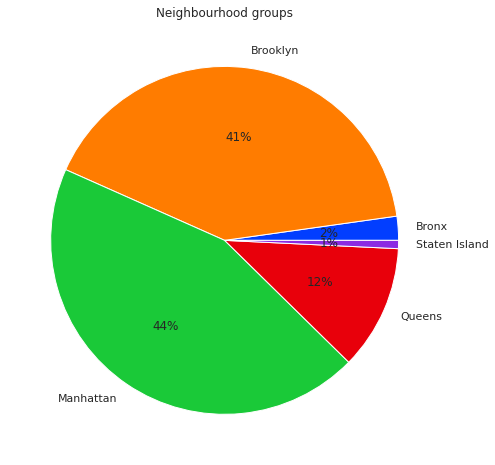

In [31]:
#create pie chart
plt.pie(var['id'],labels=var['neighbourhood_group'], colors = colors, autopct='%.0f%%')
plt.title("Neighbourhood groups")
plt.show()

In [36]:
# now for the scatter plot 
title='Map of neighbourhood group locations'

In [37]:
sns.set(rc={"figure.figsize":(12, 6)})

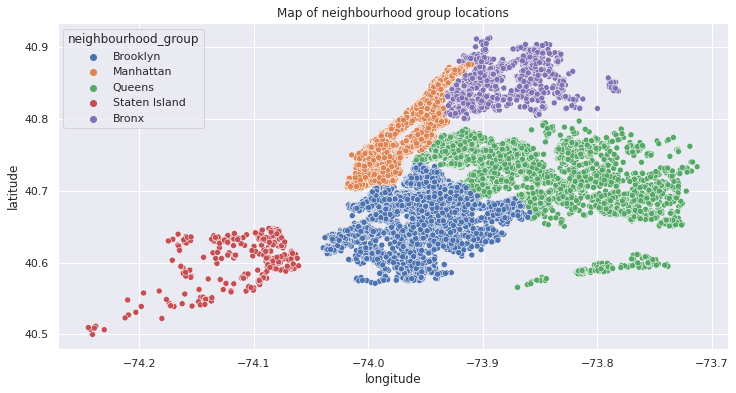

In [38]:
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['neighbourhood_group']).set_title(title)
plt.ioff()

##From above pie char it is evident that Airbnb has most hotels from Manhattan,then from Brooklyn and then from Bronx and Staten Island respectively.

##Now lets have a look at room_type !!

In [44]:
temp=data.groupby('room_type')['id'].count().reset_index()

In [49]:
temp.rename({'id':'count'},axis=1,inplace=True)


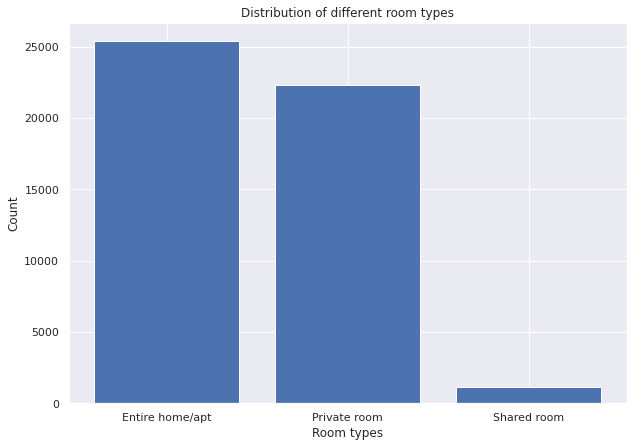

In [50]:
fig = plt.figure(figsize =(10, 7))
plt.xlabel("Room types")
plt.ylabel("Count")
plt.title("Distribution of different room types")
plt.bar(temp['room_type'],temp['count'])
plt.show()

##Listing of entire home/appartment is the highest followed by private rooms and at last comes shared rooms.

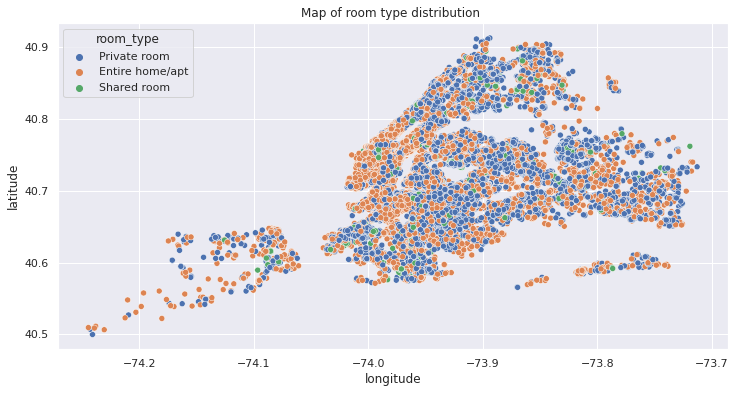

In [52]:
#location-wise distribution of type of room 
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['room_type']).set_title('Map of room type distribution ')
plt.ioff()

##Next lets look at room type in each neighbourhood group 

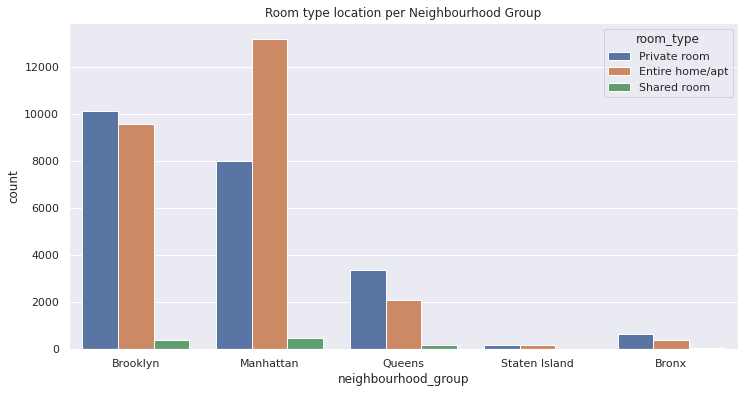

In [56]:
title = 'Room type location per Neighbourhood Group'
sns.countplot(x='neighbourhood_group',hue='room_type', data=data);
plt.title(title)
plt.ioff()

##Listing of entire home/apartment is highest in Manhattan while Brooklyn has private room listing at the highest though entire home/apt listing is not too far behind.It can be observed that shared rooms have very less listing in each of the neighbourhood groups

##Now its time to look at the most important and interesting attribute of dataset the price. 

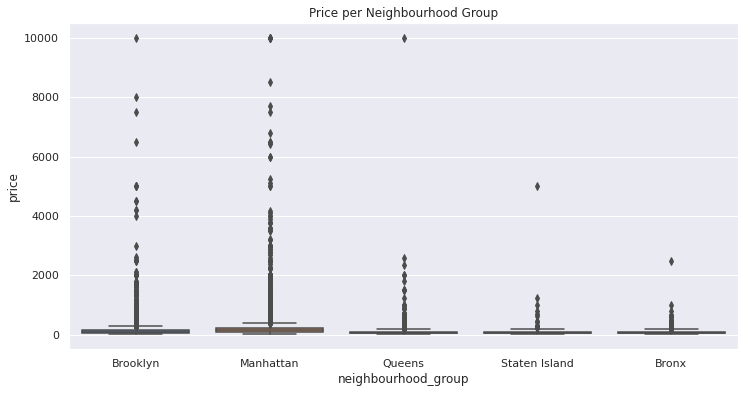

In [57]:
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()

## From the above boxplot it can be observed that most of the listings in various neighbourhood groups are in lower range. For the proper analysis of the price attribute in various neighbourhood groups we have to divide our data set. One group can be of listing having higher value and a second group having lower values.Now the question is on what value the price variable must be divided? At first my thinking was to take median of the price attribute as the pivot but it would not have given a good analysis since the box plot seems skewed.Therefore we are taking highest median of price of Airbnb listing amoung the neighbourhood groups.

In [73]:
title = 'Median Price per Neighbourhood Group'
temp= data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')

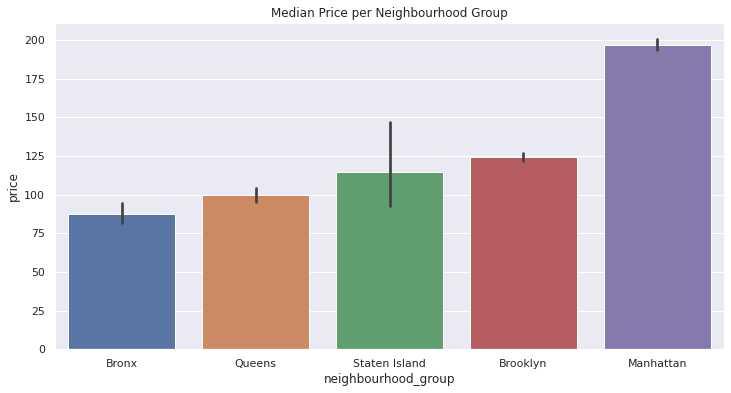

In [74]:
sns.barplot(x=data['neighbourhood_group'], y=data["price"], order=temp['neighbourhood_group'])
plt.title(title)
plt.ioff()

## Manhattan have some really expensive proprties.Median price range in Manhattan is around 175-180.Pivot point for this analysis will be 175 dollars.

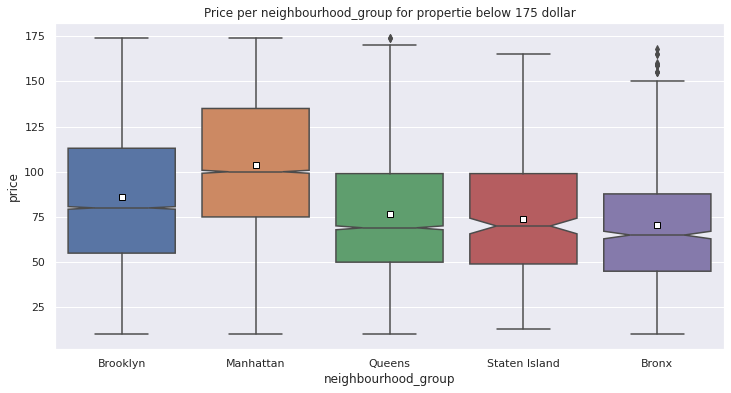

In [77]:
title = 'Price per neighbourhood_group for propertie below 175 dollar'
data_below=data.loc[data['price'] < 175]
#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_below, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#observation :-

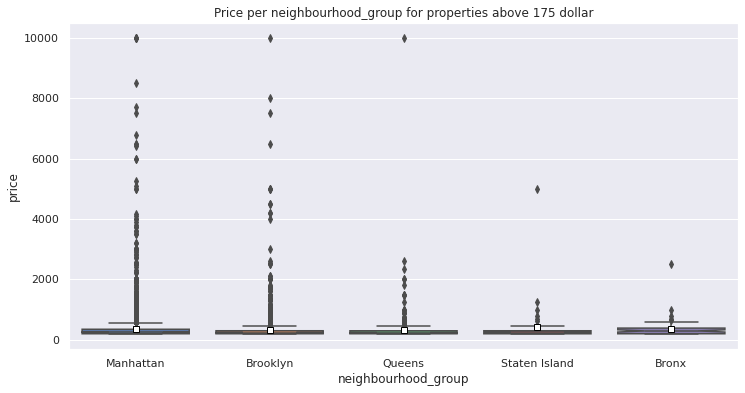

In [79]:
title = 'Price per neighbourhood_group for properties above 175 dollar'
data_above=data.loc[data['price'] > 175]
#f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_above, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#Observation